In [2]:
import numpy as np
import matplotlib.pyplot as plt
import json, pandas as pd, glob, tqdm

# One

In [48]:
tables = {}
for f in tqdm.tqdm(glob.glob('saved/*/log.jsons')):
    args, hparams = {}, {}
    with open(f) as fh:
        for l in fh:
            j = json.loads(l)
            t = j.pop('table')
            if t == 'args': args = j
            elif t == 'hyperparams': hparams = j
            elif t == 'epoch':
                j.update(args)
                j.update(hparams)
                tables.setdefault(t, []).append(j)
dfs = {t: pd.DataFrame(v) for t, v in tables.items()}
epoch = dfs['epoch']


epoch['plotdim'] = epoch.apply(lambda x:
                               6 if x.netspec == 'inf' else x['ndim'], 1)

final = epoch[(epoch.i == 29) & (epoch.dt == 0.5)]
final = final[final.tgtfreq == 10]

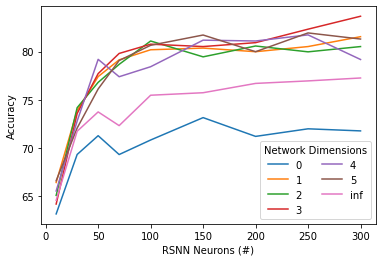

In [51]:
take = [
    '3e0.00', '3e0.05', '3e0.10', '3e0.15',
    '3e0.20', '3e0.25', '3e0.30', '3e0.35',
    '3e0.40', '3e0.45', '3e0.50']

finalnormal = final[~final.net.isin(take)]

finalnormal

for net, sub in finalnormal.groupby('netspec'):
    sub = sub.sort_values('nhidden') # type: ignore
    sub = sub[['nhidden', 't1p']].groupby('nhidden').median()
    plt.plot(sub.index, sub.t1p, label=net)
plt.legend(title='Network Dimensions', ncol=2)
plt.xlabel('RSNN Neurons (#)')
plt.ylabel('Accuracy')
plt.show()


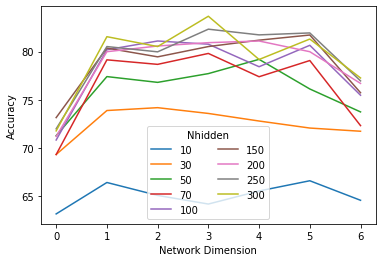

In [52]:
for nh, sub in finalnormal.groupby('nhidden'):
    sub = sub.sort_values('plotdim') # type: ignore
    sub = sub[['plotdim', 't1p']].groupby('plotdim').median()
    plt.plot(sub.index, sub.t1p, label=nh)
plt.legend(title='Nhidden', ncol=2)
plt.xlabel('Network Dimension')
plt.ylabel('Accuracy')
plt.show()

In [39]:
take = [
    '3e0.00', '3e0.05', '3e0.10', '3e0.15',
    '3e0.20', '3e0.25', '3e0.30', '3e0.35',
    '3e0.40', '3e0.45', '3e0.50']

finaleps = final[final.net.isin(take)]

finaleps = (finaleps.loc[:, finaleps.nunique() > 1]).copy()
finaleps['eps'] = finaleps['netspec'].str.split('e').str[1].astype(float)
print(finaleps['netspec'].values[0])
finaleps = finaleps.drop('netspec', axis='columns').drop('net', axis='columns').drop('id', axis='columns')
finaleps = finaleps.groupby(['nhidden', 'eps']).median().reset_index().drop('seed', axis='columns')
finaleps

3e0.30


,nhidden,eps,t1p,t3p,t1p_train,t3p_train
0,10,0.00,66.247108,89.076973,79.890324,95.853367
1,10,0.05,64.959496,88.418697,79.349461,95.560394
2,10,0.10,65.480324,87.912327,81.234974,95.582932
3,10,0.15,65.834778,88.628471,79.139122,95.710636
4,10,0.20,65.205437,87.659145,80.280949,95.462742
5,10,0.25,65.726276,88.078709,78.756008,94.568810
6,10,0.30,63.360823,87.557869,79.725060,95.462738
7,10,0.35,64.894386,88.382526,79.356972,95.492790
8,10,0.40,63.982929,89.286747,82.406849,96.319111
9,10,0.45,67.440685,90.241608,79.552280,95.289963


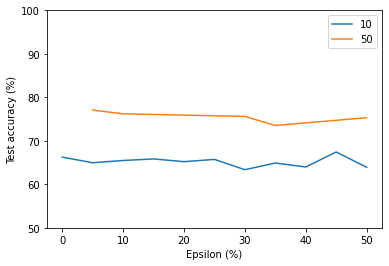

In [47]:
for n, sub in finaleps.groupby('nhidden'):
    if n not in [10, 50]:
        continue
    plt.plot(sub.eps * 100, sub.t1p, label=n)
    # plt.plot(sub.eps * 100, sub.t1p_train, label=n)

plt.xlabel('Epsilon (%)')
plt.ylabel('Test accuracy (%)')
plt.ylim(50, 100)
plt.savefig('./')
plt.legend()

In [54]:
# 

In [55]:
# 

# Two

In [3]:
# glob.glob('saved/*/epoch_00000000.npz')

In [118]:
#'saved/20251104_d3e0.00_h30_lr0.001_llNone_dt0.5_d57726df-ed90-4fa3-a28a-f9d6c8288b4c/epoch_00000000.npz'
trace = [
    dict(np.load(x))
    for x in 
    sorted(x for x in glob.glob(
        # 'saved/20251104_d3e0.00_h30_lr0.001_llNone_dt0.5_937dcdb4-e2f0-4c7b-8384-9257ad4c7987/epoch_*.npz'
        # '/tmp/savd/20251106_d2e0.1_h10_lr0.1_ll10_dt0.5_2fc78afa-13fb-4f39-8fd8-11f21bf57256/epoch_*.npz'
        '/tmp/saved/*/epoch_*.npz'
    ) if not 'read' in x)
]


In [119]:
columns = trace[0].keys()

trace = {
    k: np.array([x[k] for x in trace]) for k in columns
}

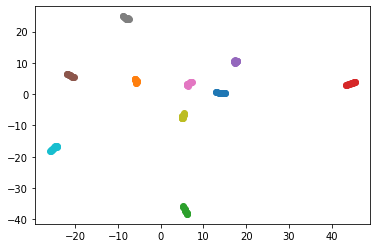

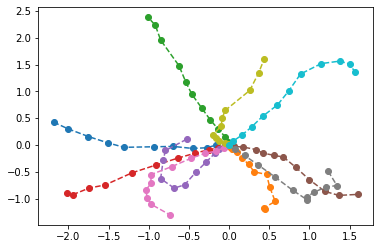

In [120]:
for i in range(10):
    x = trace['ipos'][:,i,0]
    y = trace['ipos'][:,i,1]
    plt.plot(x, y, 'o--')
plt.figure()

for i in range(10):
    x = trace['ipos'][:,i,0] - trace['ipos'][0,i,0]
    y = trace['ipos'][:,i,1] - trace['ipos'][0,i,1]
    plt.plot(x, y, 'o--')

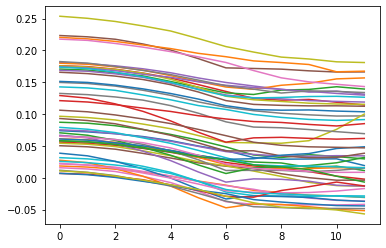

In [121]:
for i in range(10):
    plt.plot(trace['rw'][:,i,(i+1)%10])
    plt.plot(trace['rw'][:,i,(i+2)%10])
    plt.plot(trace['rw'][:,i,(i+3)%10])
    plt.plot(trace['rw'][:,i,(i+4)%10])
    plt.plot(trace['rw'][:,i,(i+5)%10])

Text(0.5, 0, 'Epoch')

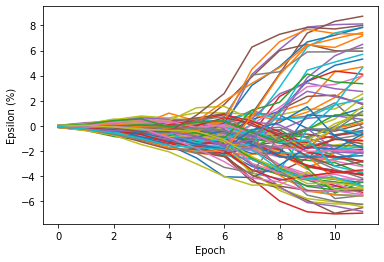

In [122]:
import numpy as np
for i in range(100):
    plt.plot(100 * 0.1 * np.tanh(trace['ierr'][:,i]))
plt.ylabel('Epsilon (%)')
plt.xlabel('Epoch')

In [123]:

# Distance p;lot

In [125]:
trace = [
    dict(np.load(x))
    for x in 
    sorted(x for x in glob.glob(
        # 'saved/20251104_d3e0.00_h30_lr0.001_llNone_dt0.5_937dcdb4-e2f0-4c7b-8384-9257ad4c7987/epoch_*.npz'
        # '/tmp/saved/20251106_d2e0.1_h10_lr0.1_ll10_dt0.5_2fc78afa-13fb-4f39-8fd8-11f21bf57256/epoch_*.npz'
        '/tmp/saved/*/epoch_*.npz'
    ) if not 'read' in x)
]

columns = trace[0].keys()

trace = {
    k: np.array([x[k] for x in trace]) for k in columns
}

(100,)
(100,)


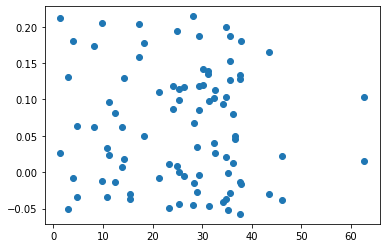

In [126]:
import jax
import jax.numpy as jnp
def spatial_to_delay(r, from_=None):
    if from_ is not None:
        d = jax.vmap(lambda ri: jnp.sqrt(1e-2+((from_ - ri)**2).sum(axis=1)))(r)
        # d.shape is here (r.shape[0], from_.shape[0])
        d = d.flatten()
        return d
    else:
        d = jax.vmap(lambda ri: jnp.sqrt(1e-2+((r - ri)**2).sum(axis=1)))(r)
        d = diagonal_const(d, 1000000)
        d = d.flatten()
        return d
    
    

def diagonal_const(arr, c):
    n = arr.shape[0]
    return arr * (1 - jnp.eye(n)) + jnp.eye(n) * c

X = trace['rw'][-1].flatten()

Y = spatial_to_delay(trace['rpos'][-1])

m = Y != Y.max()

print(X.shape)
print(Y.shape)

plt.scatter(Y[m], X[m])

